# Simple Starter Notebook for;
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [3]:
# check data shapes
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [4]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [5]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [6]:
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


# Let's look for missing values

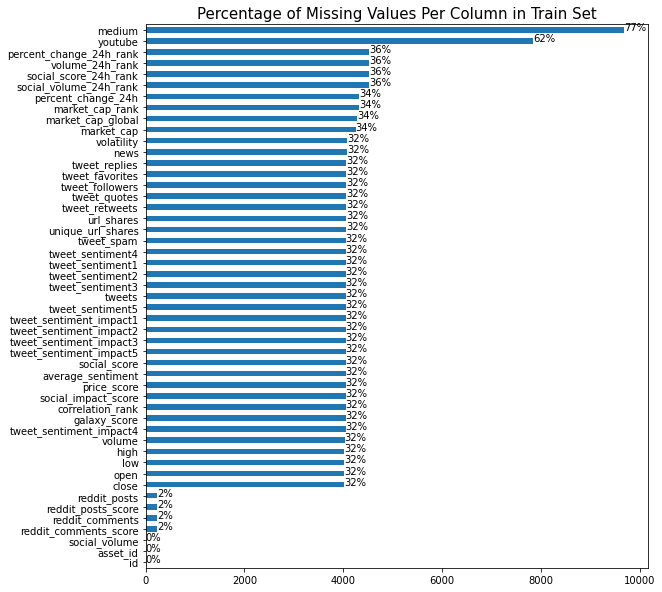

In [7]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

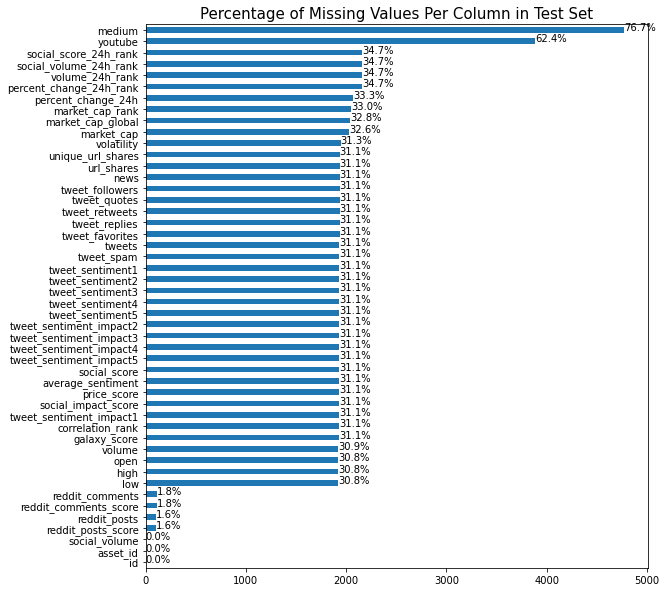

In [8]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<AxesSubplot:xlabel='social_volume', ylabel='high'>

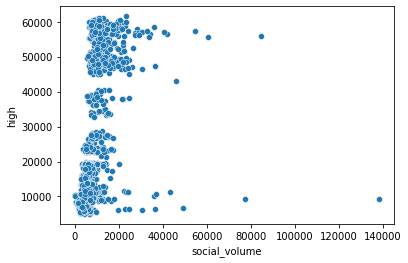

In [9]:
sns.scatterplot(data=test, x="social_volume", y="high")

In [10]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

train = train[train['close'] > 0.0]
train.shape

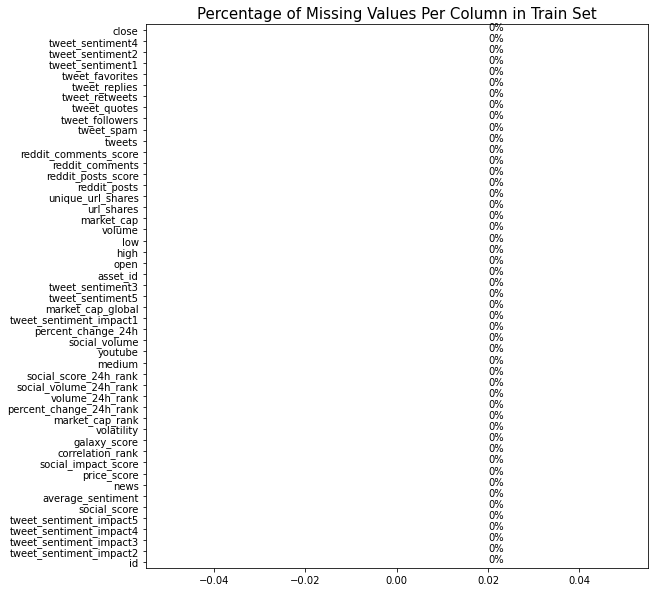

In [11]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [12]:
train.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

cat_cols = train[['tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank',]]

float_cols = train[['price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'percent_change_24h', 'market_cap_global', 'volatility'
       , 'average_sentiment', 'open', 'high', 'low', 'market_cap']]

num_cols = train[['volume','url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_volume']]

for col in train.columns:
       if col in cat_cols:
              train[col] = train[col].astype('category')
              test[col] =test[col].astype('category')
       elif col in num_cols:
              train[col] = train[col].astype(np.int64)
              test[col] =test[col].astype(np.int64)
       elif col in float_cols:
              train[col] = train[col].astype(float)
              test[col] =test[col].astype(float)

y = train['close'].astype(float)              
train.info()

In [13]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [14]:
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close'])
trains = train[main_cols]
tests = test[main_cols]
X = trains[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, tests.shape

((8842, 47), (8842,), (3790, 47), (3790,), (6222, 47))

# Begin Modeling

In [15]:
import sklearn
from sklearn import pipeline
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, roc_auc_score
from math import sqrt
import xgboost as xgb

In [16]:
xg = xgb.XGBRegressor(missing=2, seed=42, learning_rate = 0.017, max_depth = 8, n_estimators = 1000,
                      colsample_bylevel = 0.89075, colsample_bytree = 0.89075, nthread=8, scale_pos_weight=0.0005, min_child_weight=0.0005)
xg_hist = xg.fit(X_train, y_train, verbose= True, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:16866.18555
[1]	validation_0-rmse:16580.11133
[2]	validation_0-rmse:16299.09277
[3]	validation_0-rmse:16022.35254
[4]	validation_0-rmse:15751.07715
[5]	validation_0-rmse:15483.39551
[6]	validation_0-rmse:15220.66504
[7]	validation_0-rmse:14962.81641
[8]	validation_0-rmse:14708.66797
[9]	validation_0-rmse:14458.76172
[10]	validation_0-rmse:14213.39062
[11]	validation_0-rmse:13972.12695
[12]	validation_0-rmse:13735.76269
[13]	validation_0-rmse:13503.00098
[14]	validation_0-rmse:13273.74219
[15]	validation_0-rmse:13049.17383
[16]	validation_0-rmse:12827.57031
[17]	validation_0-rmse:12610.56348
[18]	validation_0-rmse:12396.61914
[19]	validation_0-rmse:12185.88379
[20]	validation_0-rmse:11979.41016
[21]	validation_0-rmse:11776.95215
[22]	validation_0-rmse:11577.36328
[23]	validation_0-rmse:11380.75684
[24]	validation_0-rmse:11188.08398
[25]	validation_0-rmse:10998.60547
[26]	validation_0-rmse:10811.97461
[27]	validation_0-rmse:10628.46289
[28]	validation_0-rmse:10447.9

In [17]:
xg_scores = model_selection.cross_val_score(xg_hist, X_train, y_train, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [18]:
print(-1 * xg_scores)
print(-1 * xg_scores.mean())
print(sqrt(-1 * xg_scores.mean()))
print(xg_scores.std())

[3377.71336077 3310.69944798 3141.4059906  3453.51842139 3018.27907615]
3260.3232593780003
57.09924044484305
158.97752693860218


In [19]:
# Make prediction on the test set
xg_predict = xg_hist.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, xg_predict))
print('Mean Squared Error:', mean_squared_error(y_test, xg_predict))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test,  xg_predict)))
print('Mean Squared Log Error:',mean_squared_log_error(y_test, xg_predict))
print('R-Squared Score:', r2_score(y_test, xg_predict))

Mean Absolute Error: 21.75373916505058
Mean Squared Error: 3446.56752815959
Root Mean Squared Error: 58.70747421035579
Mean Squared Log Error: 0.006379758547621574
R-Squared Score: 0.9999813806915884


from sklearn.metrics import mean_squared_error, r2_score
r2_score(test_val, y_test)

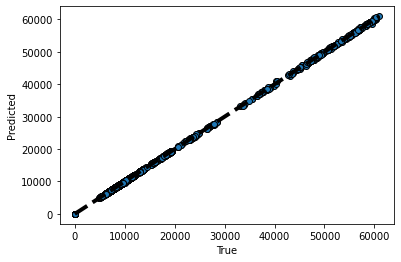

In [20]:
from sklearn.model_selection import cross_val_predict, cross_validate
test_pred = xg_hist.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, test_pred, edgecolors=(0,0,0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(test_pred, y_test)

0.9999813797983464

In [22]:
# Make predictions in test set and prepare submission file
xg_predictions = xg_hist.predict(tests)
xgsubmission = pd.DataFrame()
xgsubmission['id'] = test.id
xgsubmission['close'] = xg_predictions

def convert_null(col):
    if col < 1:
        return 0
    else:
        return col

xgsubmission['close'] = xgsubmission['close'].apply(convert_null)
xgsubmission.to_csv('XGBSubmission12.csv', index = False)

In [23]:
xgsubmission.head()

,id,close
0,ID_323Sn2,0.000000
1,ID_325SNW,11359.480469
2,ID_325uzE,6301.499512
3,ID_328qCx,0.000000
4,ID_3293uJ,0.000000
